# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.
1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from parso.python.tokenize import group
from scipy.stats import ttest_ind, mannwhitneyu
# Fixing random state for reproducibility
np.random.seed(2360873)
N = 100

importando o dataframe

In [4]:
df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


imprimindo as colunas

In [5]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

semparando as variaveis do dataframe

In [7]:
df_filtrado = df[['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']]
df_filtrado

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia
0,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa
1,2015-01-01,M,True,True,Empresário,Secundário,Casado,Casa
2,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa
3,2015-01-01,F,True,False,Empresário,Secundário,Casado,Casa
4,2015-01-01,M,False,False,Assalariado,Secundário,Casado,Casa
...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,Assalariado,Secundário,Casado,Casa
14996,2016-03-01,M,True,True,Servidor público,Superior completo,Casado,Estúdio
14997,2016-03-01,F,True,True,Assalariado,Secundário,Casado,Casa
14998,2016-03-01,F,False,True,Servidor público,Superior completo,Casado,Casa


Plotando os gráficos de contagem para todas as variáveis qualitativas

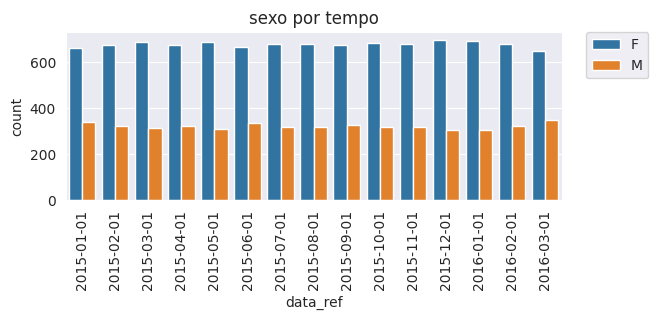

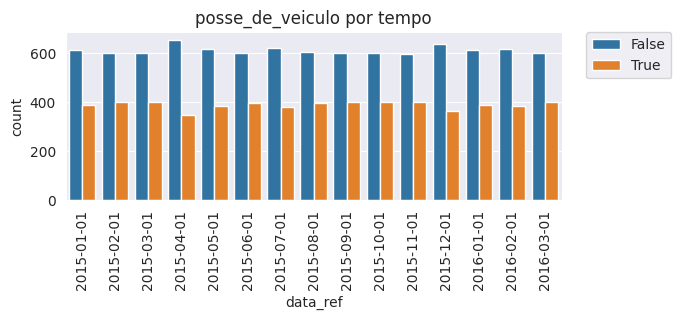

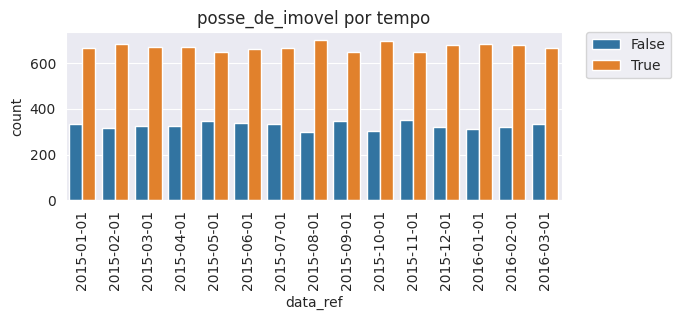

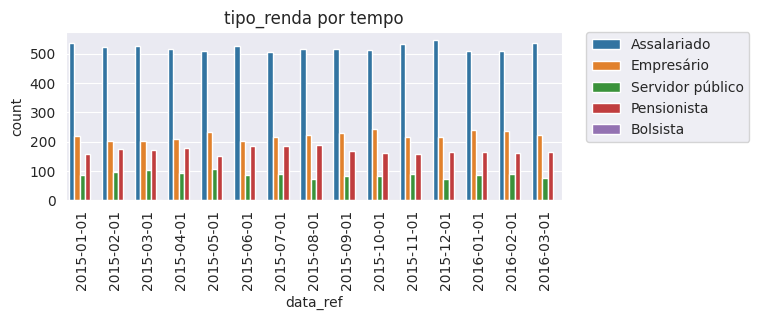

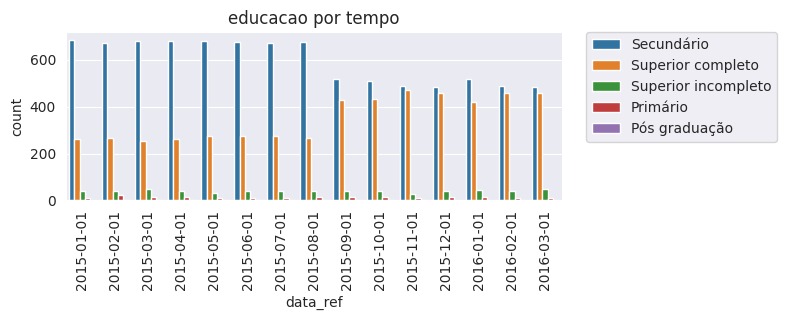

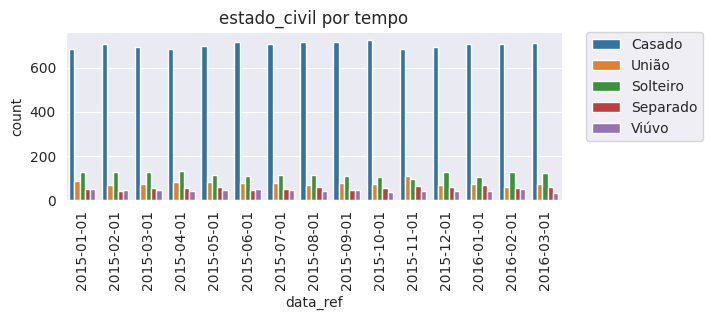

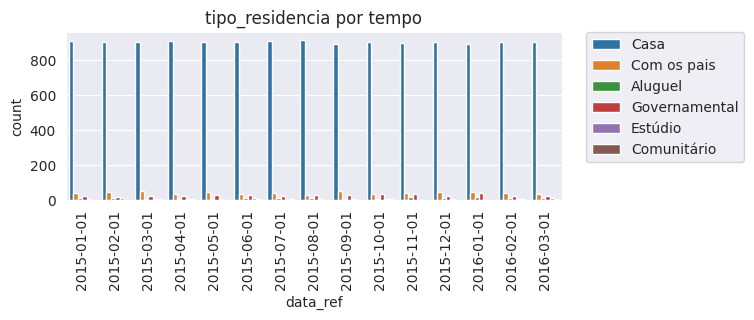

In [8]:
# Plotando os gráficos de contagem para todas as variáveis qualitativas cont=1
for var in df_filtrado.columns[1:]:
    plt.subplot(2,1,cont)
    cont =+ 1
    sns.countplot(df, x='data_ref', hue=var)
    plt.title(f'{var} por tempo')
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()


1- No histograma de sexo por tempo, é mostrada a distribuição de pessoas ao longo do tempo. O sexo feminino apresenta o maior aumento.

2- No gráfico posse_de_veículo por tempo, observa-se a quantidade de pessoas que possuem ou não um veículo ao longo do tempo. Aparentemente, o número de pessoas sem veículo (False) é maior.

3- No gráfico posse_de_imóvel por tempo, é apresentada a quantidade de pessoas que possuem imóvel próprio, representado por True. Neste caso, True é predominante.

4- No gráfico tipo_renda por tempo, percebe-se um aumento de assalariados ao longo do tempo. Além disso, também houve um aumento no número de empresários, servidores públicos e pensionistas. Já para bolsistas, não houve um aumento significativo.

5- No gráfico educação por tempo, as pessoas com ensino secundário apresentaram um aumento no início, de 2015-01-01 a 2015-08-01. Após esse período, o ensino superior completo manteve uma média. Por outro lado, ensino superior incompleto, primário e pós-graduação não apresentaram aumento significativo.

6- No gráfico estado_civil por tempo, as pessoas casadas mostraram um aumento ao longo do tempo. Já os grupos união estável, solteiros, separados e viúvos não tiveram aumentos significativos.

7- No gráfico tipo_residência por tempo, as pessoas com casa própria mantiveram a posse de suas casas ao longo do tempo. Em contrapartida, os tipos de residência como com os pais, aluguel, governamental, estúdio e comunitário não apresentaram aumento significativo.

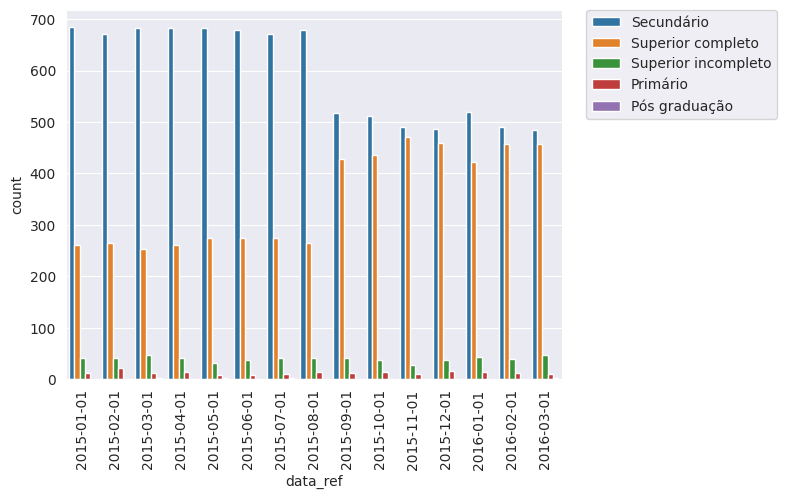

In [9]:
# Analisando o gráfico de escolaridade mais de perto
ax = sns.countplot(x='data_ref', hue='educacao', data= df_filtrado)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

No gráfico educação, ao analisar as pessoas com ensino secundário, observa-se um aumento no início, entre 2015-01-01 e 2015-08-01. Após esse período, houve uma estabilização na média de pessoas com ensino superior completo, o que indica que, provavelmente, muitas dessas pessoas com ensino secundário concluíram o ensino superior. Já para os grupos com ensino superior incompleto, primário e pós-graduação, não houve um aumento significativo.

.02) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [10]:
# criando um novo dataframe apenas com variáveis qualitativas
df_qualitativa = df.select_dtypes(include='object')


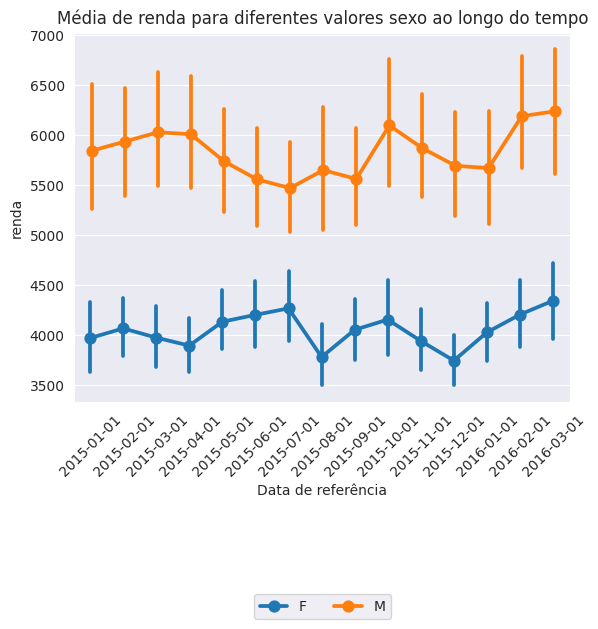

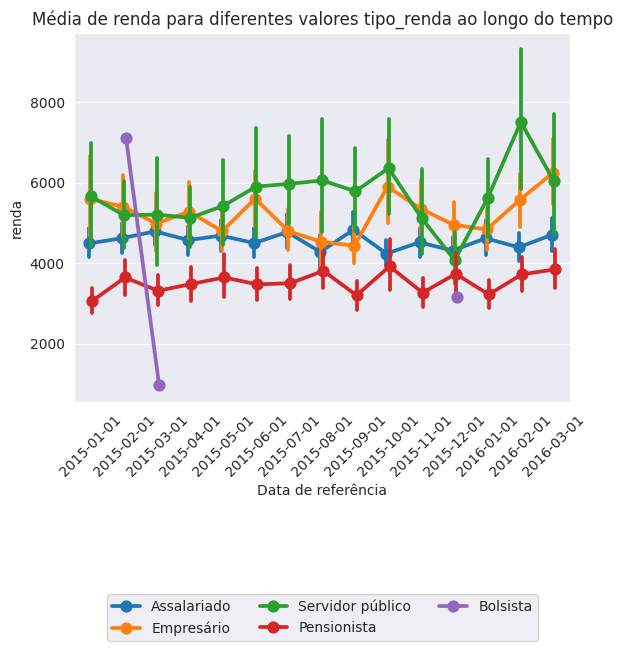

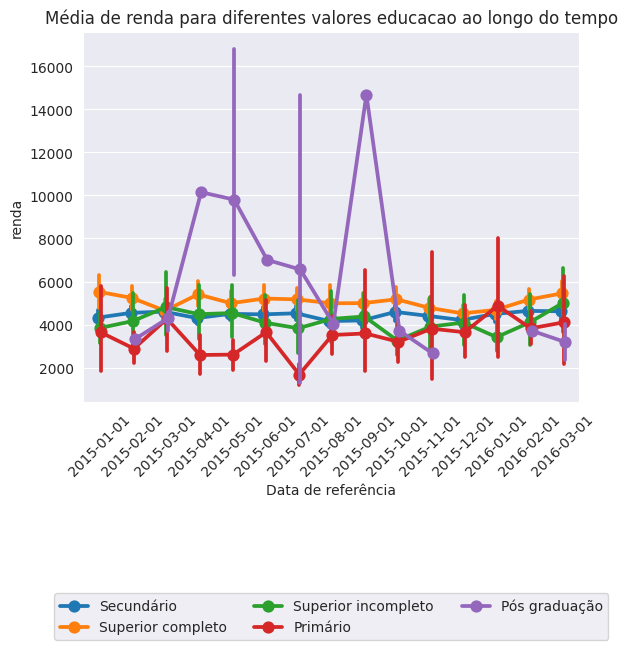

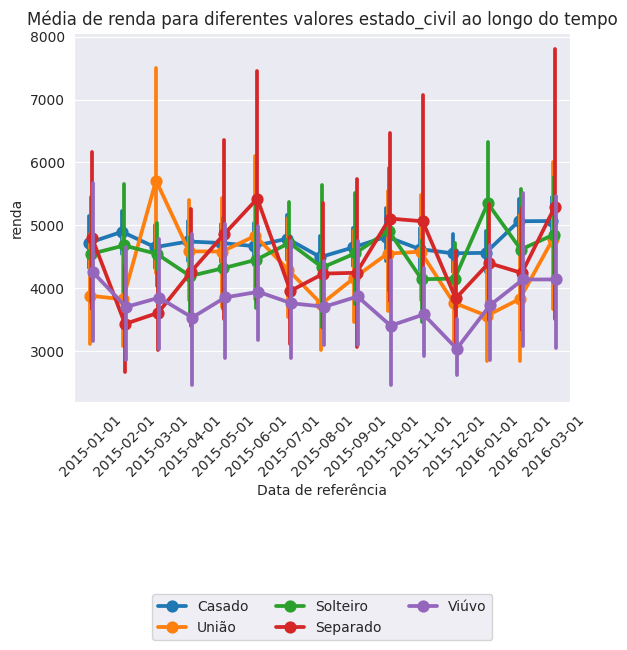

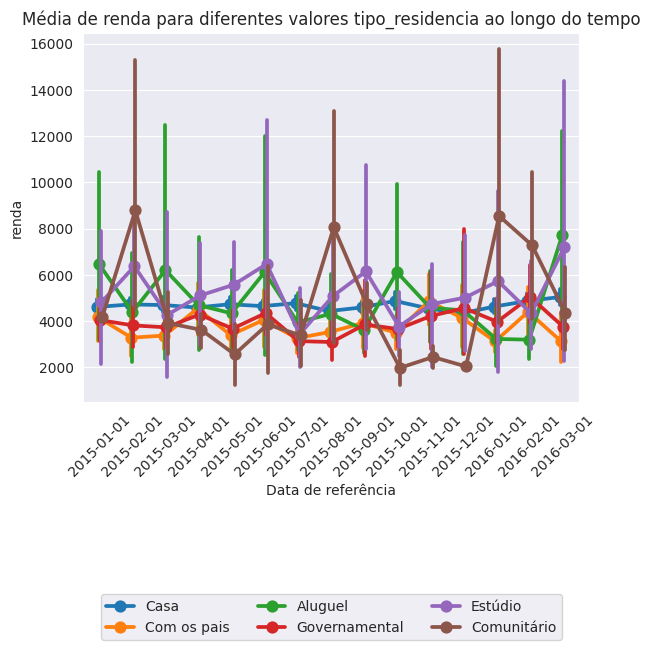

In [11]:
# Plotando os gráficos de contagem para todas as variáveis qualitativas
cont = 1
for col in df_qualitativa.columns[1:]:
    plt.subplot(1,1,cont)
    cont=+ 1
    sns.pointplot(x="data_ref", y="renda", hue = col,
                  data=df, dodge=True, errorbar=('ci', 95))
    plt.title(f'Média de renda para diferentes valores {col} ao longo do tempo')
    plt.xticks(rotation=45)
    plt.xlabel('Data de referência')
    plt.legend(loc = 'upper center', bbox_to_anchor=(0.5, -.50),ncol = 3)
    plt.show()


1- A média de renda para diferentes valores de sexo ao longo do tempo mostra que as pessoas do sexo masculino sempre tiveram salários mais altos ao longo do tempo.

2- A média de renda para diferentes valores de tipo_renda ao longo do tempo indica que servidores públicos tiveram uma renda base no início, mas ao longo do tempo houve um aumento, assim como os empresários. Por outro lado, assalariados, bolsistas e pensionistas mantiveram uma renda muito baixa ao longo do tempo, com exceção dos bolsistas, que tiveram uma renda elevada em 2015-02-01, embora tenha sido apenas temporária.

3- A média de renda para diferentes valores de educação ao longo do tempo mostra que pessoas com pós-graduação tiveram uma boa média de renda entre 2015-01-01 e 2015-09-01, mas depois essa média diminuiu. Já as pessoas com ensino secundário, superior incompleto, superior completo e primário não apresentaram aumentos significativos.

4- A média de renda para diferentes valores de estado_civil ao longo do tempo revela que pessoas em união estável tiveram um aumento entre 2015-01-01 e 2015-03-01. Pessoas separadas também tiveram um aumento ao longo do tempo. Já os grupos casados, solteiros e viúvos não apresentaram aumentos significativos.

5- A média de renda para diferentes valores de tipo_residência ao longo do tempo mostra que pessoas em residências do tipo comunitário apresentaram um aumento ao longo do tempo, assim como as pessoas em aluguel e estúdio. Por outro lado, pessoas com casa própria, morando com os pais ou em moradias governamentais não apresentaram aumentos significativos.
